In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv('Data_Train.xlsx - Sheet1.csv')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape
train_data.dropna(inplace = True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data = train_data.copy()

In [9]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
# convert data_of_journey (featurization)
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [17]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [18]:
data['journey_day'] = data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month
data['journey_year'] = data['Date_of_Journey'].dt.year

In [19]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-11-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-16 05:50:00,2022-11-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-11-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-11-16 18:05:00,2022-11-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-11-16 16:50:00,2022-11-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-11-16 19:55:00,2022-11-16 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-11-16 20:45:00,2022-11-16 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-11-16 08:20:00,2022-11-16 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-11-16 11:30:00,2022-11-16 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [20]:
#featurization using map, lambda, splitting, function etc. Make a copy again and trying it
data1 = train_data.copy()

In [21]:
data1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [22]:
data1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
def change_into_datetimes(col):
    data1[col] = pd.to_datetime(data1[col])

In [24]:
data1[['Date_of_Journey','Dep_Time','Arrival_Time']] = np.vectorize(pd.to_datetime)(data1[['Date_of_Journey','Dep_Time','Arrival_Time']])

In [25]:
data1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [26]:
data1.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [27]:
#back to data
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-11-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-16 05:50:00,2022-11-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [28]:
data.drop('Date_of_Journey', axis = 1, inplace = True)

In [29]:
def extract_hour_min(df, col):
    df[col+ '_hour'] = df[col].dt.hour
    df[col+ '_minute'] = df[col].dt.minute
    df.drop(col, axis=1, inplace = True)
    return df.head(2)

In [30]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [31]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [32]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot:>

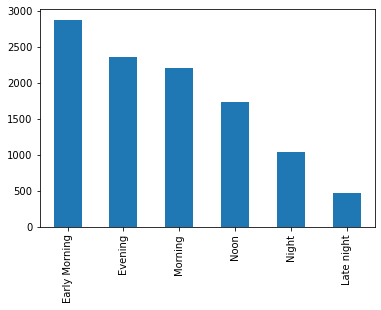

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [34]:
#interactive graph visualizationdef preprocess_duration(x):
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [35]:
cf.go_offline()

In [36]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [37]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [38]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [39]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [40]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [41]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [42]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [43]:
data['Duration_hours'] = data['Duration'].apply(lambda x: x.split(' ')[0][0:-1])

In [44]:
data['Duration_minutes'] = data['Duration'].apply(lambda x: x.split(' ')[1][0:-1])

Does Duration Affect Price? Which City has maximum final destination of flights?

In [45]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [46]:
data['Duration_total_minutes'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


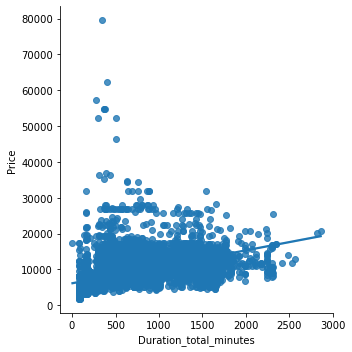

In [48]:
sns.lmplot(x='Duration_total_minutes', y='Price', data = data)

In [49]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [50]:
data['Destination'].value_counts().iplot(kind='bar')

In [51]:
#on which route is jet airways mostly used
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [52]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [53]:
data[data['Airline'] == 'IndiGo'].groupby('Route').size().sort_values(ascending=False)

Route
BLR → DEL                483
CCU → BLR                320
DEL → BOM → COK          302
DEL → HYD → COK          196
BOM → HYD                195
MAA → CCU                184
DEL → COK                 59
DEL → BLR → COK           57
CCU → MAA → BLR           37
DEL → MAA → COK           34
CCU → HYD → BLR           32
CCU → BBI → BLR           19
DEL → HYD → MAA → COK     18
BLR → HYD → DEL           18
DEL → LKO → COK           17
DEL → PNQ → COK           12
CCU → PNQ → BLR           11
CCU → PAT → BLR           10
CCU → NAG → BLR            9
BLR → IDR → DEL            5
DEL → BBI → COK            5
BLR → BOM → DEL            4
CCU → GAU → BLR            3
DEL → AMD → COK            3
BLR → NAG → DEL            3
BLR → LKO → DEL            3
BLR → AMD → DEL            3
DEL → TRV → COK            2
BLR → STV → DEL            2
BLR → GOI → DEL            1
CCU → VTZ → BLR            1
BOM → GOI → HYD            1
CCU → IXA → BLR            1
CCU → BOM → BLR            1
BLR → MA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

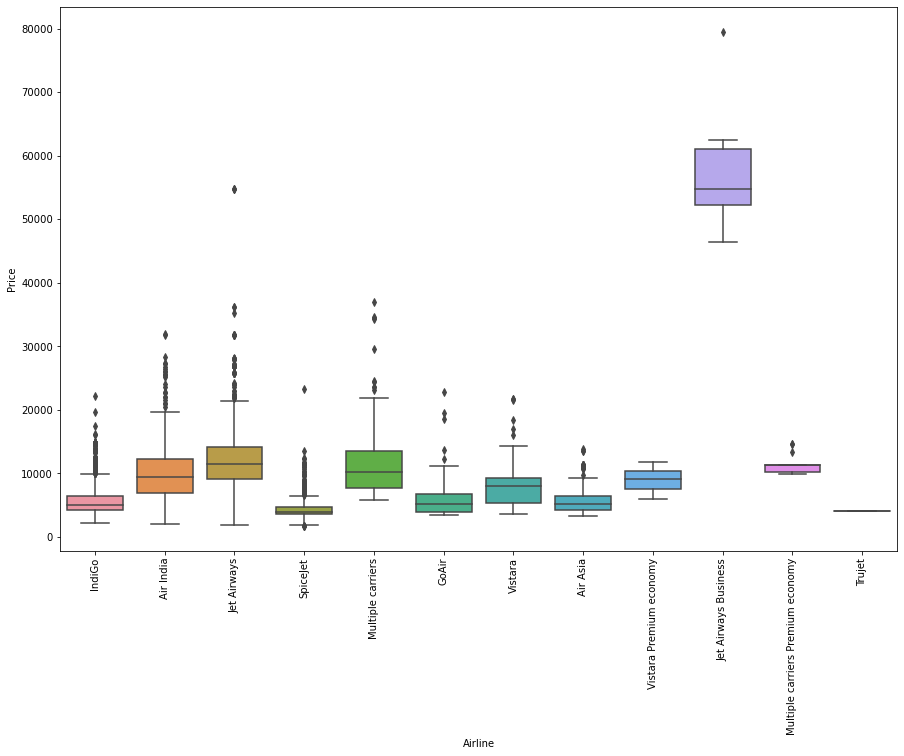

In [54]:
#Airline vs Price Analysis
plt.figure(figsize = (15,10))
sns.boxplot(y = data['Price'],x = 'Airline', data = data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

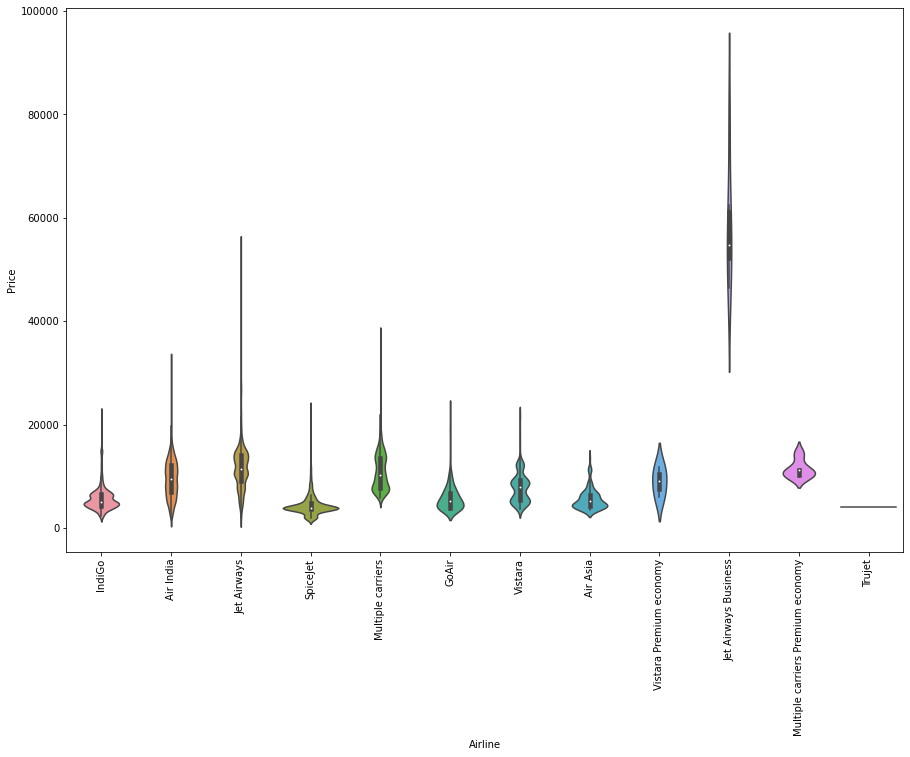

In [55]:
plt.figure(figsize = (15,10))
sns.violinplot(x = data['Airline'], y = data['Price'])
plt.xticks(rotation = 90)

In [56]:
#Applying one-hot on data
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [57]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [58]:
data.drop(columns=['Additional_Info','Route','Duration_total_minutes'], axis = 1, inplace = True)

In [59]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,7,25


In [60]:
cat_col = [col for col in data.columns if data[col].dtype !='object']

In [61]:
cat_col

['Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [62]:
data.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total_Stops            object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes       object
dtype: object

In [63]:
data['Duration_minutes'] = data['Duration_minutes'].astype(str).astype(int)

In [64]:
data.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total_Stops            object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes        int64
dtype: object

In [65]:
cat_col = [col for col in data.columns if data[col].dtype =='object']

In [66]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Duration',
 'Total_Stops',
 'Duration_hours']

In [67]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
data['Source'].apply(lambda x: 1 if x== 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [69]:
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [70]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,2019,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,2019,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,2019,16,50,21,35,4,45,1,0,0,0,0


In [71]:
#target encoding the airline data
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [72]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [73]:
dict1 = {key : index for index, key in enumerate(airlines, 0)}

In [74]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [75]:
data['Airline'] = data['Airline'].map(dict1)

In [76]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [77]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,2019,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,2019,16,50,21,35,4,45,1,0,0,0,0


In [78]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [79]:
data['Destination'].replace('New Delhi','Delhi',inplace = True)

In [80]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [81]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [82]:
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [83]:
dict2 = {key : index for index, key in enumerate(destination, 0)}

In [84]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [85]:
data['Destination'] = data['Destination'].map(dict2)

In [86]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [87]:
stops = data.groupby(['Total_Stops'])['Price'].mean().sort_values().index

In [88]:
dict3 = {key : index for index, key in enumerate(stops,0)}

In [89]:
dict3

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [90]:
data['Total_Stops'] = data['Total_Stops'].map(dict3)

In [91]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,2019,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,2019,16,50,21,35,4,45,1,0,0,0,0


In [92]:
data.dtypes

Airline                 int64
Source                 object
Destination             int64
Duration               object
Total_Stops             int64
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes        int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [93]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3, kde=False)

/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

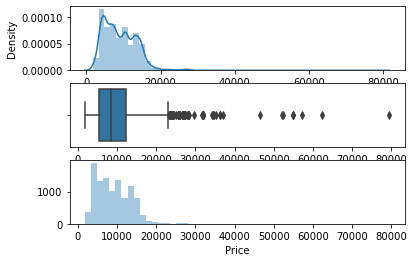

In [94]:
plot(data,'Price')

In [95]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(),data['Price'])

/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



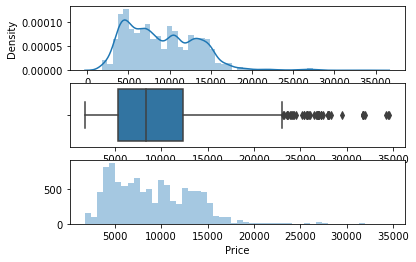

In [96]:
plot(data,'Price')

In [97]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,2019,5,50,13,15,7,25,0,1,0,0,0


In [98]:
data.drop(columns = ['Source','Duration'], axis=1,inplace=True)

In [99]:
data.head()

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,2019,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,3,1,2019,16,50,21,35,4,45,1,0,0,0,0


In [100]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
journey_year             int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours          object
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [101]:
#feature selection - SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [102]:
X = data.drop(['Price'], axis = 1)

In [103]:
y = data['Price']

In [104]:
mutual_info_regression(X,y)

array([1.31723904, 1.05970473, 0.78375022, 0.60486365, 0.41799849,
       0.        , 0.9274245 , 0.76070314, 1.14176325, 0.90361178,
       1.12501314, 0.67426215, 0.38540851, 0.45592567, 0.52121315,
       0.12865096, 0.20239048])

In [105]:
#Check dependency between 2 variables
#if = 0, then 2 variables are independent
imp = pd.DataFrame(mutual_info_regression(X,y), index = X.columns)
imp.columns=['importance']

In [106]:
imp.sort_values(by='importance',ascending=False)

,importance
Airline,1.315642
Arrival_Time_hour,1.143537
Duration_hours,1.121916
Destination,1.061173
Dep_Time_hour,0.927265
Arrival_Time_minute,0.894768
Total_Stops,0.789139
Dep_Time_minute,0.758885
Duration_minutes,0.671792
journey_day,0.613337


In [107]:
#random forest (classification and regression)
#follows ensemble learning approach, learns from multiple models and will combine all the learning
#collection of multiple decision trees using bagging

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
ml_model = RandomForestRegressor()

In [112]:
model = ml_model.fit(X_train, y_train)

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_pred

array([16756.91  ,  6508.85  ,  8869.66  , ...,  6676.28  , 12483.1875,
       13318.833 ])

In [115]:
y_pred.shape

(2137,)

In [116]:
#defining function for MAPE

def mape(y_true, y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [117]:
mape(y_test,y_pred)

13.329702123257714

In [118]:
#automating ML pipeline
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print("Training Score: {}".format(model.score(X_train,y_train)))
    prediction=model.predict(X_test)
    print("Predictions are : {}".format(y_pred))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_pred)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_pred))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('MAPE : ', mape(y_test,y_pred))
    sns.distplot(y_test-y_pred)

Training Score: 0.9508255746325102
Predictions are : [16756.91    6508.85    8869.66   ...  6676.28   12483.1875 13318.833 ]


r2_score: 0.8105081040080332
MSE :  3815474.8896129807
MAE :  1200.1626551062673
RMSE :  1953.32406159679
MAPE :  13.329702123257714


/Users/rahuljestadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



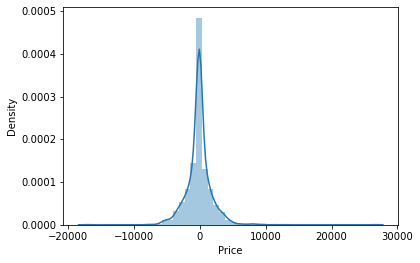

In [119]:
predict(RandomForestRegressor())

In [120]:
#hypertune model
from sklearn.model_selection import RandomizedSearchCV

In [121]:
reg_rf = RandomForestRegressor()

In [122]:
np.linspace(start=1000, stop=1200, num=6)

n_estimators=[int(x) for x in np.linspace(start=1000, stop=1200, num=6)]
max_features=["auto", "sqrt"]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split=[5,10,15,100]

In [123]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [124]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [125]:
rf_random = RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [126]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [127]:
rf_random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 21}

In [128]:
pred2=rf_random.predict(X_test)

In [129]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8194527378920983

In [130]:
#to predict what model would have worked better
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = []

models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('RFR', RandomForestRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('DTR', DecisionTreeRegressor()))

names = []
results = []

for name, model in models:
  model = model.fit(X_train, y_train)
  accuracy = model.score(X_test, y_test)
  results.append(accuracy)
  names.append(name)
  print('%s:%f'%(name, accuracy))

LR:0.550032
LA:0.549958
RFR:0.809492
EN:0.511799
KNN:0.628264
SVM:-0.025736
DTR:0.689886


In [131]:
predictions = rf_random.predict(X_test)

In [132]:
predictions

array([16608.94055594,  6513.65749431,  8834.33676119, ...,
        6679.30025007, 12690.9681482 , 12939.80428179])

In [133]:
import pickle 

[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=   9.9s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=1040; total time=  24.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=   9.8s
[CV] END max_depth=30, max_features=auto, min_samples_split=100, n_estimators=1080; total time=  22.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=10, n_estimators=1040; total time=   8.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=   9.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=  10.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1160; total time=   9.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1160;

In [134]:
file = open('flight_flight.pkl','wb')
pickle.dump(rf_random,file)


In [141]:
model = pickle.load(open('flight_flight.pkl','rb'))


In [143]:
y_prediction = model.predict(X_test)
metrics.r2_score(y_test,y_prediction)

0.8267662882267572

In [137]:
data.head(10)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,2019,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,3,1,2019,16,50,21,35,4,45,1,0,0,0,0
5,1,3,0,3873.0,24,6,2019,9,0,11,25,2,25,0,1,0,0,0
6,10,2,1,11087.0,3,12,2019,18,55,10,25,15,30,1,0,0,0,0
7,10,2,1,22270.0,3,1,2019,8,0,5,5,21,5,1,0,0,0,0
8,10,2,1,11087.0,3,12,2019,8,55,10,25,25,30,1,0,0,0,0
9,8,4,1,8625.0,27,5,2019,11,25,19,15,7,50,0,0,1,0,0


In [144]:
input_data = (3,2,0,24,3,2019,22,20,1,10,2,50,1,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)



[5811.1355045]
